In [10]:
import pandas as pd 
import numpy as np
import scipy.stats
from google.colab import drive 
from matplotlib import pyplot as plt
from keybert import KeyBERT
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


drive.mount('/content/drive')

path = "/content/drive/MyDrive/UAlberta.csv"
data = pd.read_csv(path, encoding="cp1252")
courses = pd.DataFrame(data)
symbols = {}
keyword = []
courses.dropna(axis=1, how='all', inplace=True)
pd.set_option('display.max_columns', None)


# drop useless cols
object_cols = ['university', 'abbreviation', 'university_homepage', 'course_homepage']
for col in object_cols:        
  courses.drop(f'{col}', axis=1, inplace=True)

# convert null desc and prerequisite
fill_nan_value = "no description"
courses.fillna({"description": fill_nan_value})
courses.fillna({"prerequisite": fill_nan_value})

# remove extra lines
courses.dropna(inplace=True, axis=0)
# reset_index_in_frame
courses.reset_index(inplace=True, drop=True)

#convert_unit_count
counter = 0
for row in courses['unit_count']:
    units = row.split("-")
    if len(units) == 1:
        units = float(units[0])
    else:
        min_unit = float(units[0])
        max_unit = float(units[1])
        units = (min_unit+max_unit)/2
    courses.loc[counter].at['unit_count'] = units
    counter += 1
courses = courses.astype({"unit_count": "float"})

courses

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,department_name,course_title,unit_count,prerequisite,description
0,Accounting and Bus Analytics,\t\t\t\tACCTG 311 - Introduction to Accounting...,3.0,ECON 101 and 102.,How to prepare and interpret financial statem...
1,Accounting and Bus Analytics,\t\t\t\tACCTG 322 - Introduction to Accounting...,3.0,ACCTG 311.,In contrast to the external orientation of AC...
2,Accounting and Bus Analytics,\t\t\t\tACCTG 412 - Financial Reporting for Ma...,3.0,ACCTG 311. Corequisite: FIN 301. Not open to ...,Course is for students who are not accounting...
3,Accounting and Bus Analytics,\t\t\t\tACCTG 414 - Intermediate Financial Acc...,3.0,ACCTG 311 and 322. Not open to students with ...,"First of two courses covering principles, met..."
4,Accounting and Bus Analytics,\t\t\t\tACCTG 415 - Intermediate Financial Acc...,3.0,"FIN 301, and a minimum grade of C- in ACCTG 414.",Second of two courses (see ACCTG 414) coverin...
...,...,...,...,...,...
4205,Earth & Atmospheric Sci,\t\t\t\tPLAN 412 - Finance for Planners,3.0,ECON 101. Not available for students with cre...,An introduction to municipal finances and the...
4206,Earth & Atmospheric Sci,\t\t\t\tPLAN 470 - Geographical Information Sy...,3.0,EAS 221. Not available for students with cred...,The application of spatial analytic tools for...
4207,Earth & Atmospheric Sci,\t\t\t\tPLAN 495 - Planning Studio,3.0,PLAN 310 or HGP 310. Restricted to Planning M...,Practical study of community planning process...
4208,Earth & Atmospheric Sci,\t\t\t\tPLAN 499 - Planning Field School,3.0,PLAN 210 or HGP 210 and Consent of Instructor...,Intensive field or practical study in Urban a...


get stat

In [8]:
print("departments & number of courses: ")
courses_count = courses.groupby('department_name').size()
print(courses_count)
departments = {"department_name": courses['department_name'].unique()}
departments_frame = pd.DataFrame(departments)
unit_counts = []
unit_counts_mean = []
for department in courses["department_name"].unique():
    unit_count_sum = courses['unit_count'][courses["department_name"] == department].sum()
    unit_count_mean = courses['unit_count'][courses["department_name"] == department].mean()
    unit_counts.append(unit_count_sum)
    unit_counts_mean.append(unit_count_mean)
departments_frame["unit_count_sum"] = unit_counts
departments_frame["unit_count_mean"] = unit_counts_mean
print("-----------------------------------------------------")
print(departments_frame)
print("-----------------------------------------------------")

departments & number of courses: 
department_name
 AU Fine Arts                     243
 AU Science                       165
 AU Social Sciences               222
 Accounting and Bus Analytics      80
 Agric, Food & Nutr Sci           158
                                 ... 
 St Josephï  College                8
 Strategy, Enterprenshp & Mgmt     45
 Surgery                            2
 University of Alberta              1
 Womenï  and Gender Studies        19
Length: 91, dtype: int64
-----------------------------------------------------
                       department_name  unit_count_sum  unit_count_mean
0         Accounting and Bus Analytics           240.0         3.000000
1       Resource Econ Enviro Sociology           240.0         3.000000
2               Agric, Food & Nutr Sci           477.0         3.018987
3       Modern Lang & Cultural Studies           480.0         3.037975
4                              Anatomy            53.0         4.076923
..                   

describe

In [9]:
courses.describe()

,unit_count
count,4210.000000
mean,3.085843
std,0.905283
min,0.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,15.000000


sorted by department name

In [11]:
sorted = courses.sort_values(by='department_name')
sorted

,department_name,course_title,unit_count,prerequisite,description
825,AU Fine Arts,\t\t\t\tAUREL 392 - Directed Reading in Religi...,3.0,Consent of the Instructor. Note: An ï¿½Applic...,Intensive study in a specific area of religio...
390,AU Fine Arts,\t\t\t\tAUDRA 244 - Improvisation II: Workshop...,3.0,AUDRA 144.,Intensive study in the work of Viola Spolin a...
389,AU Fine Arts,\t\t\t\tAUDRA 239 - Theatre Company,3.0,AUDRA 138 or 139 and consent of the instructo...,Ensemble production of improvisational or scr...
388,AU Fine Arts,\t\t\t\tAUDRA 238 - Theatre Company,3.0,AUDRA 138 or 139 and consent of the instructo...,Ensemble production of improvisational or scr...
387,AU Fine Arts,\t\t\t\tAUDRA 201 - History and Critical Analy...,3.0,AUDRA 101.,"Survey of crucial works, genres, and styles, ..."
...,...,...,...,...,...
4027,Womenï and Gender Studies,\t\t\t\tWGS 321 - Feminism and Film,3.0,"Any 100 or 200 level WGS or WST course, or co...","Feminist analysis of gender, sexuality, abili..."
4026,Womenï and Gender Studies,\t\t\t\tWGS 315 - Histories of Gender,3.0,"Any 100 or 200 level WGS or W ST course, or c...",Introduction to a range of practices and idea...
4025,Womenï and Gender Studies,\t\t\t\tWGS 310 - Gender and Social Justice in...,3.0,"Any 100 or 200 level WGS or W ST course, or c...",The lives of men and women in contemporary Af...
4035,Womenï and Gender Studies,\t\t\t\tWGS 431 - Feminism and Sexual Assault,3.0,"Any 100 or 200 level WSG or W ST course, or d...",Interdisciplinary consideration of conceptual...


convert objects

In [15]:
object_cols = ['department_name']
for col in object_cols:
    symbols.update({f'{col}': {}})
    count = 0
    for k in courses[f'{col}'].unique():
        courses[f'{col}'] = courses[f'{col}'].replace([f'{k}'], count)
        symbols[f'{col}'][f'{k}'] = count
        count = count + 1
symbols
courses

,department_name,course_title,unit_count,prerequisite,description
0,0,\t\t\t\tACCTG 311 - Introduction to Accounting...,3.0,ECON 101 and 102.,How to prepare and interpret financial statem...
1,0,\t\t\t\tACCTG 322 - Introduction to Accounting...,3.0,ACCTG 311.,In contrast to the external orientation of AC...
2,0,\t\t\t\tACCTG 412 - Financial Reporting for Ma...,3.0,ACCTG 311. Corequisite: FIN 301. Not open to ...,Course is for students who are not accounting...
3,0,\t\t\t\tACCTG 414 - Intermediate Financial Acc...,3.0,ACCTG 311 and 322. Not open to students with ...,"First of two courses covering principles, met..."
4,0,\t\t\t\tACCTG 415 - Intermediate Financial Acc...,3.0,"FIN 301, and a minimum grade of C- in ACCTG 414.",Second of two courses (see ACCTG 414) coverin...
...,...,...,...,...,...
4205,34,\t\t\t\tPLAN 412 - Finance for Planners,3.0,ECON 101. Not available for students with cre...,An introduction to municipal finances and the...
4206,34,\t\t\t\tPLAN 470 - Geographical Information Sy...,3.0,EAS 221. Not available for students with cred...,The application of spatial analytic tools for...
4207,34,\t\t\t\tPLAN 495 - Planning Studio,3.0,PLAN 310 or HGP 310. Restricted to Planning M...,Practical study of community planning process...
4208,34,\t\t\t\tPLAN 499 - Planning Field School,3.0,PLAN 210 or HGP 210 and Consent of Instructor...,Intensive field or practical study in Urban a...


In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()

keyword = []

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(column):
   stemmer = nltk.stem.SnowballStemmer("english")
   keywords_roots = dict()  # collect the words / root
   keywords_select = dict()  # association: root <-> keyword
   category_keys = []
   count_keywords = dict()
   for keyword in courses[column]:
       if pd.isnull(keyword): continue
       lines = keyword.lower()
       tokenized = nltk.word_tokenize(lines)
       nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

       for noun in nouns:
           noun = noun.lower()
           racine = stemmer.stem(noun)
           if racine in keywords_roots:
               keywords_roots[racine].add(noun)
               count_keywords[racine] += 1
           else:
               keywords_roots[racine] = {noun}
               count_keywords[racine] = 1

   for keyword in keywords_roots.keys():
       if len(keywords_roots[keyword]) > 1:
           min_length = 1000
           for k in keywords_roots[keyword]:
               if len(k) < min_length:
                   clef = k
                   min_length = len(k)
           category_keys.append(clef)
           keywords_select[keyword] = clef
       else:
           category_keys.append(list(keywords_roots[keyword])[0])
           keywords_select[keyword] = list(keywords_roots[keyword])[0]
   print("Nb of keywords in variable '{}': {}".format(column, len(category_keys)))
   list_courses = []
   for k, v in count_keywords.items():
       list_courses.append([keywords_select[k], v])
   list_courses.sort(key=lambda x: x[1], reverse=True)
  #  plot_word_occurence(list_courses, column)
   return category_keys


def plot_word_occurence(courses_list, column):
    course_list = sorted(courses_list, key=lambda x: x[1], reverse=True)
    plt.rc('font', weight='normal')
    fig, ax = plt.subplots(figsize=(7, 25))
    y_axis = [i[1] for i in course_list[:125]]
    x_axis = [k for k, i in enumerate(course_list[:125])]
    x_label = [i[0] for i in course_list[:125]]
    plt.yticks(x_axis, x_label)
    plt.tick_params(axis='y', which='major', labelsize=3)
    plt.xlabel("Nb. of occurences", fontsize=10, labelpad=10)
    ax.barh(x_axis, y_axis, align='center')
    ax = plt.gca()
    ax.invert_yaxis()
    plt.title("Words occurrence", bbox={'facecolor': 'k', 'pad': 5}, color='w', fontsize=15)
    plt.show()


def tokenize_text(text):
    tokenize_content = nltk.word_tokenize(str(text).lower())
    tokens = remove_stop_word_and_lema(tokenize_content)
    return tokens

def remove_stop_word_and_lema(tokenize_content):
     stop_words = stopwords.words('english') + list(punctuation)
     tokens = []
     for token in tokenize_content:
         if token not in stop_words:
             tokens.append(lemmatizer.lemmatize(token))
     return ' '.join(tokens)

cols = ['description', 'prerequisite']
for column_name in cols:
  courses[f'{column_name}'] = courses[f'{column_name}'].apply(tokenize_text)
  keyword.extend(keywords_inventory(f'{column_name}'))

keyword

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Nb of keywords in variable 'description': 3856
Nb of keywords in variable 'prerequisite': 653


['prepare',
 'statement',
 'report',
 'decision',
 'maker',
 'enterprise',
 'shareholder',
 'creditor',
 'course',
 'balance',
 'sheet',
 'income',
 'measure',
 'disclosure',
 'cash',
 'flow',
 'analysis',
 'use',
 'contrast',
 'orientation',
 'focus',
 'inform',
 'manage',
 'topic',
 'role',
 'goal',
 'control',
 'concept',
 'cost',
 'perform',
 'student',
 'career',
 'cfa',
 'design',
 'account',
 'knowledge',
 'foundation',
 'tax',
 'depth',
 'earnings',
 'share',
 'application',
 'principle',
 'gaap',
 'investment',
 'asset',
 'method',
 'liability',
 'equity',
 'issue',
 'set',
 'framework',
 'value',
 'capital',
 'market',
 'contract',
 'compensation',
 'practice',
 'area',
 'business',
 'combination',
 'operator',
 'profit',
 'organ',
 'mastery',
 'technique',
 'implement',
 'evaluate',
 'system',
 'standard',
 'approach',
 'allocation',
 'estimate',
 'product',
 'revenue',
 'incentive',
 'strategy',
 'regression',
 'research',
 'case',
 'governance',
 'process',
 'audit',
 'res

In [ ]:
def find_association_rules():
    te = TransactionEncoder()
    te_ary = te.fit(keyword).transform(keyword)
    print(te_ary)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = find_frequent_items(df)
    return association_rules(frequent_itemsets, metric="lift")

def find_frequent_items(df):
    return apriori(df, min_support=0.4, use_colnames=True)

Detect Outliers

In [19]:
int_float_cols = courses.select_dtypes(['int64', 'float64'])
index_array = []
for col in int_float_cols:
    Q1 = courses[f"{col}"].quantile(0.25)
    Q3 = courses[f"{col}"].quantile(0.75)
    IQR = Q3 - Q1
    for i in courses.index:
        data = courses[f"{col}"][i]
        if data < Q1 - 1.5*IQR or data > Q3 + 1.5*IQR:
            index_array.append(i)
    courses.drop(index=index_array, inplace=True)
courses

,department_name,course_title,unit_count,prerequisite,description
0,0,\t\t\t\tACCTG 311 - Introduction to Accounting...,3.0,ECON 101 and 102.,How to prepare and interpret financial statem...
1,0,\t\t\t\tACCTG 322 - Introduction to Accounting...,3.0,ACCTG 311.,In contrast to the external orientation of AC...
2,0,\t\t\t\tACCTG 412 - Financial Reporting for Ma...,3.0,ACCTG 311. Corequisite: FIN 301. Not open to ...,Course is for students who are not accounting...
3,0,\t\t\t\tACCTG 414 - Intermediate Financial Acc...,3.0,ACCTG 311 and 322. Not open to students with ...,"First of two courses covering principles, met..."
4,0,\t\t\t\tACCTG 415 - Intermediate Financial Acc...,3.0,"FIN 301, and a minimum grade of C- in ACCTG 414.",Second of two courses (see ACCTG 414) coverin...
...,...,...,...,...,...
4205,34,\t\t\t\tPLAN 412 - Finance for Planners,3.0,ECON 101. Not available for students with cre...,An introduction to municipal finances and the...
4206,34,\t\t\t\tPLAN 470 - Geographical Information Sy...,3.0,EAS 221. Not available for students with cred...,The application of spatial analytic tools for...
4207,34,\t\t\t\tPLAN 495 - Planning Studio,3.0,PLAN 310 or HGP 310. Restricted to Planning M...,Practical study of community planning process...
4208,34,\t\t\t\tPLAN 499 - Planning Field School,3.0,PLAN 210 or HGP 210 and Consent of Instructor...,Intensive field or practical study in Urban a...


circular plt

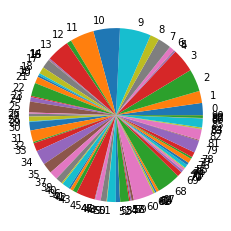

In [20]:
labels = courses["department_name"].unique()
unit_counts = []
for department in courses["department_name"].unique():
    unit_count_sum = courses['unit_count'][courses["department_name"] == department].sum()
    unit_counts.append(unit_count_sum)
plt.pie(unit_counts, labels=labels)
plt.show()

bar plt

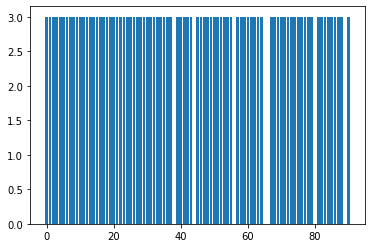

In [21]:
index = courses["department_name"].unique()
unit_counts = []
for department in courses["department_name"].unique():
    unit_count_sum = courses['unit_count'][courses["department_name"] == department].mean()
    unit_counts.append(unit_count_sum)
plt.bar(index, unit_counts)
plt.show()

convert pandas dataframe into a list of lists

In [43]:
records = []
for i in range(0, len(courses.index)):
    records.append([str(courses.values[i,j]) for j in range(0, courses.shape[1])])
records

[['0',
  '\t\t\t\tACCTG 311 - Introduction to Accounting for Financial Performance',
  '3.0',
  'econ 101 102',
  'prepare interpret financial statement report decision maker external enterprise shareholder creditor course includes principle standard balance sheet valuation income measurement financial disclosure cash flow analysis link preparation use statement'],
 ['0',
  '\t\t\t\tACCTG 322 - Introduction to Accounting for Management Decision Making',
  '3.0',
  'acctg 311',
  'contrast external orientation acctg 311 course focus prepare use accounting information management decision making major topic include role corporate goal planning control concept cost behave analyze manage budgeting performance measure'],
 ['0',
  '\t\t\t\tACCTG 412 - Financial Reporting for Managers and Analysts',
  '3.0',
  'acctg 311. corequisite fin 301. open student credit acctg 414 415',
  'course student accounting major especially useful contemplating career financial management cfa designation studen

In [54]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,,\t\t\t\tACCTG 311 - Introduction to Accounting for Financial Performance,\t\t\t\tACCTG 322 - Introduction to Accounting for Management Decision Making,\t\t\t\tACCTG 412 - Financial Reporting for Managers and Analysts,\t\t\t\tACCTG 414 - Intermediate Financial Accounting I,\t\t\t\tACCTG 415 - Intermediate Financial Accounting II,\t\t\t\tACCTG 416 - Accounting Theory and Current Issues,\t\t\t\tACCTG 418 - Advanced Financial Accounting,\t\t\t\tACCTG 424 - Intermediate Management Accounting,\t\t\t\tACCTG 426 - Management Control Systems,...,zool 340 342 343 physl 372 consent instructor credit may obtained offered alternate year,zool 342 343 352 pmcol 371 consent instructor credit course may obtained offered alternate year,zool 352 mmi 426 consent instructor credit obtained zool 452 552,ï¿½hands onï¿½ course designed provide student understanding appreciation theoretical practical issue conduct randomized clinical trial course student develop research proposal end submit cihr-style grant grading topic covered include background/rationale research question patient selection recruitment randomization outcome measure confounding bias sample size consideration developing analytical plan designing case report form data management quality assurance budgeting informed consent ethical consideration grantsmanship information see www.epicore.ualberta.ca/med600,ï¿½one healthï¿½ emerging paradigm public veterinary health recognizes human animal environmental health interlinked course address food water safety increase prevalence antibiotic resistant organism emerging infectious zoonotic disease environmental protection environmental sustainability emphasizing interaction diverse yet interconnected discipline protecting health population,ï¿½one healthï¿½ emerging paradigm public veterinary health recognizes human animal environmental health interlinked course address food water safety increase prevalence antibiotic resistant organism emerging infectious zoonotic disease environmental protection environmental sustainability emphasizing interaction diverse yet interconnected discipline protecting health population graduate student may register credit see sph 516 credit given one afns 416 516 sph 416 516,ï¿½one healthï¿½ emerging paradigm public veterinary health recognizes human animal environmental health interlinked course address food water safety increase prevalence antibiotic resistant organism emerging infectious zoonotic disease environmental protection environmental sustainability emphasizing interaction diverse yet interconnected discipline protecting health population lecture sph 416 additional assignment evaluation appropriate graduate study note credit may obtained ph 516 sph 516. credit given one afns 416 516 sph 416 516,ï¿½one healthï¿½ emerging paradigm public veterinary health recognizes human animal environmental health interlinked course address food water safety increase prevalence antibiotic resistant organism emerging infectious zoonotic disease environmental protection environmental sustainability emphasizing interaction diverse yet interconnected discipline protecting health population taken credit received afns 416 sph 416 sph 516,ï¿½play around worldï¿½ project provides 3-month international canadian based cross-cultural field placement working child youth ability area play recreation sport student apply selected fall term significant time commitment winter term prepare intersession field placement travel take place may august course represents experiential part project,ï¿½play around worldï¿½ project provides 3-month international canadian based cross-cultural field placement working child youth ability area play recreation sport student apply selected fall term significant time commitment winter term prepare intersession field placement travel take place may august course represents theoretical aspect experience involves written creative work area programming cross-cultural setting
0,False,True,False,False,False,False

In [68]:
# !pip install apyori

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

frequent_itemsets

# from mlxtend.frequent_patterns import association_rules

# rules = association_rules(frequent_itemsets, metric="lift")

# rules

,support,itemsets
0,1.0,(3.0)
